# Exercises

Using the titanic data, in your classification-exercises repository, create a notebook, `model.ipynb` where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

8. Work through these same exercises using the Telco dataset.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics
from env import get_db_url

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

import aquire
import prepare

In [2]:
df = pd.read_sql('SELECT * FROM passengers', get_db_url('titanic_db'))


In [ ]:
titanic_train, titanic_validate, titanic_test = prepare.split_titanic_data(prepare.clean_titanic_data(aquire.get_titanic_data()))


In [ ]:
titanic_train.head()

What is your baseline prediction?
- that everyone dies. 

In [ ]:
titanic_train.survived.value_counts()

In [ ]:
X = titanic_train.drop(columns = "survived")
Y = titanic_train.survived

baseline = 307/(307+191)
print (baseline)

In [ ]:
titanic_dt = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
titanic_dt.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(13, 7))
plot_tree(titanic_dt, feature_names=X_train.columns, class_names=titanic_dt.classes_, rounded=True)

# Random Forest Exercises

Continue working in your `model` file with titanic data to do the following: 

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

1. Evaluate your results using the model score, confusion matrix, and classification report.

1. Print and clearly label the following:  Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

1. Run through steps increasing your min_samples_leaf and decreasing your max_depth. 

1. What are the differences in the evaluation metrics?  Which performs better on your in-sample data?  Why?

After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from pydataset import data

In [ ]:
titanic_df = aquire.get_titanic_data()

In [ ]:
train, validate, test = prepare.prep_titanic_data(titanic_df)

In [ ]:
train


In [ ]:

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived', 'embark_town', 'sex'])
y_train = train.survived

X_validate = validate.drop(columns=['survived', 'embark_town', 'sex'])
y_validate = validate.survived

X_test = test.drop(columns=['survived', 'embark_town', 'sex'])
y_test = test.survived

In [ ]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

In [ ]:
rf.fit(X_train, y_train)


In [ ]:
y_pred = rf.predict(X_train)
y_pred

In [ ]:
rf.classes_

In [ ]:
print(rf.score(X_train, y_train))

In [ ]:
print(confusion_matrix(y_train, y_pred))


In [ ]:
print(classification_report(y_train, y_pred))


#### 3. print and clearly lable: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
ALL = TP+TN+FP+FN

TP, TN, FP, FN, ALL

#### 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

#### Second attempt

In [ ]:
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=8, 
                            random_state=123)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred))

#### Third attempt

In [ ]:
rf3 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=5, 
                            random_state=123)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred))

#### Fourth Attempt

In [ ]:
rf4 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=8,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_train)

In [ ]:
print(classification_report(y_train, y_pred))

#### 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
actuals = model_prediction.survived
preds = model_prediction.drop(columns = 'survived')

for column in preds.columns:
    
    accuracy = (actuals == preds[column]).mean()
    
    print(f'{column} accuracy :{accuracy}')

# KNN Exercises

Continue working in your `model.ipynb` file with the titanic dataset.

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 2-4 setting k to 10

5. Run through setps 2-4 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?

-------

Once you have completed work on the titanic dataset, try building some knn models with your telco data.

In [37]:
titanic_df = aquire.get_titanic_data()

In [38]:
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [39]:
train, validate, test = prepare.prep_titanic_data(titanic_df)

In [40]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,0,1,male,36.000000,0,0,40.1250,Cherbourg,1,1,0,0
165,1,3,male,9.000000,0,2,20.5250,Southampton,0,1,0,1
50,0,3,male,7.000000,4,1,39.6875,Southampton,0,1,0,1
259,1,2,female,50.000000,0,1,26.0000,Southampton,0,0,0,1
306,1,1,female,29.678105,0,0,110.8833,Cherbourg,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
313,0,3,male,28.000000,0,0,7.8958,Southampton,1,1,0,1
636,0,3,male,32.000000,0,0,7.9250,Southampton,1,1,0,1
222,0,3,male,51.000000,0,0,8.0500,Southampton,1,1,0,1
485,0,3,female,29.678105,3,1,25.4667,Southampton,0,0,0,1


In [33]:
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')

In [41]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived', 'embark_town', 'sex'])
y_train = train.survived

X_validate = validate.drop(columns=['survived', 'embark_town', 'sex'])
y_validate = validate.survived

X_test = test.drop(columns=['survived', 'embark_town', 'sex'])
y_test = test.survived

In [42]:
X_train.head()

,pclass,age,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
583,1,36.000000,0,0,40.1250,1,1,0,0
165,3,9.000000,0,2,20.5250,0,1,0,1
50,3,7.000000,4,1,39.6875,0,1,0,1
259,2,50.000000,0,1,26.0000,0,0,0,1
306,1,29.678105,0,0,110.8833,1,0,0,0


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 583 to 744
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pclass                   498 non-null    int64  
 1   age                      498 non-null    float64
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 28.7 KB


In [44]:
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform')

In [45]:
knn1.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [46]:
KNeighborsClassifier()


KNeighborsClassifier()

In [47]:
y_pred = knn1.predict(X_train)
y_pred[:5]

array([0, 1, 0, 1, 1])

In [48]:
y_train[:5]

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [49]:
y_pred_proba = knn1.predict_proba(X_train)
y_pred_proba[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [50]:
print(confusion_matrix(y_train, y_pred))

[[307   0]
 [  2 189]]


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


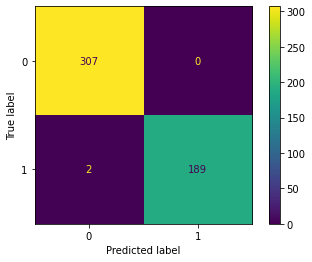

In [53]:
plot_confusion_matrix(knn1, X_train, y_train)

In [54]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()

In [55]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       307
           1       1.00      0.99      0.99       191

    accuracy                           1.00       498
   macro avg       1.00      0.99      1.00       498
weighted avg       1.00      1.00      1.00       498



### Second run-through with K = 10

In [63]:
# Create KNN Object
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

# Fit object to training data
knn10.fit(X_train, y_train)

# Make predictions on training data
y_pred10 = knn10.predict(X_train)

In [64]:
y_pred = knn10.predict(X_train)
y_pred[:5]

array([1, 1, 0, 0, 1])

In [65]:
print(confusion_matrix(y_train, y_pred))

[[275  32]
 [ 95  96]]


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


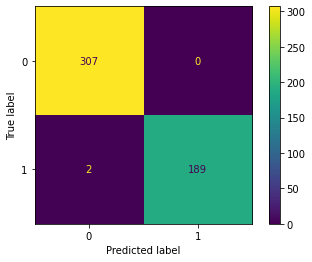

In [66]:
plot_confusion_matrix(knn1, X_train, y_train)

In [67]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       307
           1       0.75      0.50      0.60       191

    accuracy                           0.74       498
   macro avg       0.75      0.70      0.71       498
weighted avg       0.75      0.74      0.73       498



### k = 20

In [69]:
# Create KNN Object
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

# Fit object to training data
knn20.fit(X_train, y_train)

# Make predictions on training data
y_pred20 = knn20.predict(X_train)

In [70]:
y_pred = knn20.predict(X_train)
y_pred[:5]

array([0, 1, 0, 0, 1])

In [71]:
print(confusion_matrix(y_train, y_pred))

[[269  38]
 [102  89]]


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


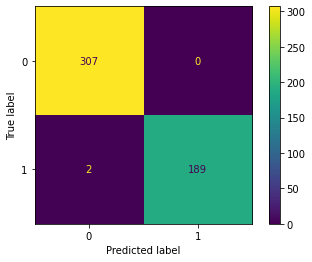

In [72]:
plot_confusion_matrix(knn1, X_train, y_train)

In [73]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.88      0.79       307
           1       0.70      0.47      0.56       191

    accuracy                           0.72       498
   macro avg       0.71      0.67      0.68       498
weighted avg       0.72      0.72      0.70       498

